In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math, os, sys, datetime
from simulator import Simulator
#from utils.batch_manager import fit_into_batch, extract_from_batch
#from utils.preprocessstock import preprocess

C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
# USER INPUT SECTION #
DATA_CSV_PATH = os.path.abspath('dataset/GOOG.csv')
MODEL_TYPE = 'tdnn' # tdnn, tdnn_pso, tdnn_de, svm, rf
BALANCE = 1000000
BUY_LIMIT_FROM_BALANCE_PORTION = 1/3
TRADE_BASE_FEE = 0
TRADE_FEE = .15
VAT = 7
CUT_LOSS = 2
UNIT_MULTIPLIER = 100
EMA_ALPHA = .25
ADAPTIVE_EMA_ALPHA = True
TRADE_SENSITIVITY = .40
TRADE_FREQUENCY = 1
#CURRENT_UNIT = 0
#MAX_UNIT_BUY_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_BUY_PER_TRADE * UNIT_MULTIPLIER
#MAX_UNIT_SELL_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_SELL_PER_TRADE * UNIT_MULTIPLIER

In [4]:
simulator = Simulator(csv_file_path=DATA_CSV_PATH,
                     model_type=MODEL_TYPE,
                     balance=BALANCE,
                     buy_limit_from_balance_portion=BUY_LIMIT_FROM_BALANCE_PORTION,
                     trade_base_fee=TRADE_BASE_FEE,
                     trade_fee=TRADE_FEE,
                     vat=VAT,
                     cut_loss=CUT_LOSS,
                     unit_multiplier=UNIT_MULTIPLIER,
                     trade_sensitivity=TRADE_SENSITIVITY,
                     ema_alpha=EMA_ALPHA,
                     adaptive_ema_alpha=ADAPTIVE_EMA_ALPHA,
                     trade_freq=TRADE_FREQUENCY)

In [5]:
r_balance, r_real_hist_price, r_y, r_pred, r_pred_hma, r_obv, r_obv_hma, r_trade_record, r_brought_units = simulator.run()

In [6]:
r_balance

738086.470694446

In [7]:
r_brought_units
#sum_r = r_balance
#for key in r_brought_units.keys():
#    sum_r += key*r_brought_units[key]
#sum_r

{1085.0263065638183: 100.0, 1084.4308407520398: 100.0}

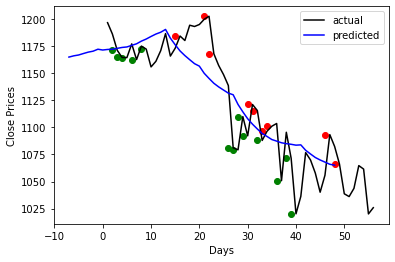

In [12]:
b_x = []
b_recs = []
bv_recs = []
s_x = []
s_recs = []
sv_recs = []
for record in r_trade_record:
    if record[0] == 'b':
        b_x.append(record[1])
        b_recs.append(record[2])
        bv_recs.append(record[3])
    elif record[0] == 's':
        s_x.append(record[1])
        s_recs.append(record[2])
        sv_recs.append(record[3])
reduce_b = {}
reduce_s = {}
for idx, val in enumerate(zip(b_x, b_recs, bv_recs)):
    if val[0] in list(reduce_b):
        reduce_b[val[0]][1] += val[2]
    else:
        reduce_b[val[0]] = [val[1],val[2]]
        
for idx, val in enumerate(zip(s_x, s_recs, sv_recs)):
    if val[0] in list(reduce_s):
        reduce_s[val[0]][1] += val[2]
    else:
        reduce_s[val[0]] = [val[1],val[2]]
        
days = np.arange(1, len(r_real_hist_price)+1)
plt.plot(days, r_real_hist_price, 'black', label='actual')
days = np.arange(-7, len(r_pred_hma)-7)
plt.plot(days, r_pred_hma, 'b', label='predicted')
plt.scatter(list(reduce_b), np.array(list(reduce_b.values()))[:,0].astype('float'), c='green', linewidths=1)
plt.scatter(list(reduce_s), np.array(list(reduce_s.values()))[:,0].astype('float'), c='red', linewidths=1)
#for i in range(len(reduce_b)):
#    plt.annotate(np.array(list(reduce_b.values()))[i,1].astype('float'), (list(reduce_b)[i], np.array(list(reduce_b.values()))[i,0].astype('float')))
#for i in range(len(reduce_s)):
#    plt.annotate(np.array(list(reduce_s.values()))[i,1].astype('float'), (list(reduce_s)[i], np.array(list(reduce_s.values()))[i,0].astype('float')))
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [13]:
r_balance/BALANCE

0.738086470694446